# 1. Import Essential Python Libs

In [1]:
#Import necessary python libraries
import numpy as np #algebric computations
import pandas as pd #data processing/handling
import matplotlib.pyplot as plt # data visualization
%matplotlib inline 
import seaborn as sns #for visualization
import warnings #need to suppress warnings
warnings.filterwarnings("ignore")

# 2. Data Reading

In [2]:
loan_df = pd.read_csv('./loan/loan.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# 3. Date Cleaning: Remove Redundant or non-relevant column

## 3.1 Remove Columns where all entries are NULL

In [4]:
loan_df1 = loan_df.dropna(axis='columns',how='all')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 3.3 Missing Value Treatment

In [5]:
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [6]:
loan_df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [7]:
# it seems almost all entries are missing for following columns: mths_since_last_delinq, mths_since_last_record, next_pymnt_d
#let's drop these columns
loan_df1 = loan_df1.drop(columns=['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'])

In [10]:
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [8]:
#columns id & member_id are for identification and book keeping; let's keep either of it
# we can drop both
loan_df2 = loan_df1.drop(columns=['id'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [9]:
# Assumption: columns funded_amnt and funded_amnt_inv are relevant to "curent" loan
# let's drop these columns
loan_df2 = loan_df2.drop(columns=['funded_amnt','funded_amnt_inv'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [10]:
loan_df2['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [11]:
#let's drop column pymnt_plan since fixed value field; it may not add any value to further analysis [assumption]
loan_df2 = loan_df2.drop(columns=['pymnt_plan'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [13]:
loan_df2['url'].value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=711082    1
https://lendingclub.com/browse/loanDetail.action?loan_id=711913    1
https://lendingclub.com/browse/loanDetail.action?loan_id=787115    1
https://lendingclub.com/browse/loanDetail.action?loan_id=379381    1
https://lendingclub.com/browse/loanDetail.action?loan_id=822168    1
                                                                  ..
https://lendingclub.com/browse/loanDetail.action?loan_id=448348    1
https://lendingclub.com/browse/loanDetail.action?loan_id=890093    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531    1
https://lendingclub.com/browse/loanDetail.action?loan_id=663607    1
https://lendingclub.com/browse/loanDetail.action?loan_id=359401    1
Name: url, Length: 39717, dtype: int64

In [14]:
# column url seems like useful for record purpose; we can drop it 
loan_df2 = loan_df2.drop(columns=['url'])


In [15]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [16]:
loan_df2['desc'].value_counts()

In [17]:
# column desc seems like keeping record about purpose of loan
# since we already have column 'purpose'; 'desc' may be redundant column. let's drop it
loan_df2 = loan_df2.drop(columns=['desc'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [18]:
loan_df2['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [19]:
loan_df2['title'].value_counts()

Debt Consolidation                       2184
Debt Consolidation Loan                  1729
Personal Loan                             659
Consolidation                             517
debt consolidation                        505
                                         ... 
Donna's                                     1
The Summer Pay Down Project                 1
Wedding / Engagement Costs                  1
Get Out Of Debt Mission Consolidation       1
Consolidate Debt Loan                       1
Name: title, Length: 19615, dtype: int64

In [20]:
# column 'title' seems like descriptive/redundant form of column 'purpose'; let's drop it
loan_df2 = loan_df2.drop(columns=['title'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [21]:
# Assumption: it seems following columns viz. 
#'delinq_2yrs', 'delinq_amnt',  
# are related to CURREN in progress loan;
#these can be dropped for further analysis since it is not clear will it become part of Charged-off or fully-paid
loan_df2 = loan_df2.drop(columns=['delinq_2yrs', 'delinq_amnt'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [22]:
loan_df2['earliest_cr_line'].value_counts()

Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Oct-54      1
Oct-69      1
Nov-54      1
Apr-69      1
Feb-67      1
Name: earliest_cr_line, Length: 526, dtype: int64

In [23]:
loan_df2['inq_last_6mths'].value_counts()

0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: inq_last_6mths, dtype: int64

In [24]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [25]:
loan_df2['pub_rec'].value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [26]:
# columns 'revol_bal' and 'revol_util' seems like opposite of each other based on Data_Dictionary.xls
# Assumption: dropping of one of these may not have an impact
loan_df2 = loan_df2.drop(columns=['revol_util'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [27]:
loan_df2['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [28]:
#since all entries has same value; we can drop column 'initial_list_status'
loan_df2 = loan_df2.drop(columns=['initial_list_status'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [29]:
# Following columns 'out_prncp' and 'out_prncp_inv' seem related to curren in-progress loan based on Data-Dictionory.xls
# let's drop them since these params may not be available at time of application
loan_df2 = loan_df2.drop(columns=['out_prncp','out_prncp_inv'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [30]:
# Following columns 'total_pymnt' and 'total_pymnt_inv' seem related to curren in-progress loan based on Data-Dictionory.xls
# let's drop them since these params may not be available at time of application
loan_df2 = loan_df2.drop(columns=['total_pymnt','total_pymnt_inv'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [31]:
#column 'total_rec_prncp' is related to loan in progress as per Data-Dictionary.xls
# let's drop it
loan_df2 = loan_df2.drop(columns=['total_rec_prncp'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [32]:
# column "total_rec_int" is about interest received on in progress loan; 
# let's drop it 
loan_df2 = loan_df2.drop(columns=['total_rec_int'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [33]:
# column 'total_rec_late_fee' is about late fee received on in progress loan
# let's drop it 
loan_df2 = loan_df2.drop(columns=['total_rec_late_fee'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [34]:
# column "recoveries" is related to amount received post declaring charged off
# we can drop it since it is not related to application timing
loan_df2 = loan_df2.drop(columns=['recoveries'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [35]:
# column 'collection_recovery_fee' it also related to post charge off situation as per Data Dictionay.xls
# assumption: not related at the time of application
loan_df2 = loan_df2.drop(columns=['collection_recovery_fee'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [36]:
# columns 'last_pymnt_d' 'last_pymnt_amnt' and 'last_credit_pull_d' are related to loan in progress
# assumption: we can drop those since may not be relevant at time of application
loan_df2 = loan_df2.drop(columns=['last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   term                        39717 non-null  object 
 3   int_rate                    39717 non-null  object 
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  object 
 6   sub_grade                   39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [37]:
# columns 'collections_12_mths_ex_med' seems to be relevant to in progress borrowing
# assumption: we can drop it
loan_df2 = loan_df2.drop(columns=['collections_12_mths_ex_med'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   member_id                 39717 non-null  int64  
 1   loan_amnt                 39717 non-null  int64  
 2   term                      39717 non-null  object 
 3   int_rate                  39717 non-null  object 
 4   installment               39717 non-null  float64
 5   grade                     39717 non-null  object 
 6   sub_grade                 39717 non-null  object 
 7   emp_title                 37258 non-null  object 
 8   emp_length                38642 non-null  object 
 9   home_ownership            39717 non-null  object 
 10  annual_inc                39717 non-null  float64
 11  verification_status       39717 non-null  object 
 12  issue_d                   39717 non-null  object 
 13  loan_status               39717 non-null  object 
 14  purpos

In [38]:
loan_df2['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

In [39]:
# seems like standard value for all entries; we can drop it
loan_df2 = loan_df2.drop(columns=['policy_code'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   member_id                 39717 non-null  int64  
 1   loan_amnt                 39717 non-null  int64  
 2   term                      39717 non-null  object 
 3   int_rate                  39717 non-null  object 
 4   installment               39717 non-null  float64
 5   grade                     39717 non-null  object 
 6   sub_grade                 39717 non-null  object 
 7   emp_title                 37258 non-null  object 
 8   emp_length                38642 non-null  object 
 9   home_ownership            39717 non-null  object 
 10  annual_inc                39717 non-null  float64
 11  verification_status       39717 non-null  object 
 12  issue_d                   39717 non-null  object 
 13  loan_status               39717 non-null  object 
 14  purpos

In [40]:
loan_df2['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [41]:
# same values for all entries; we can drop this column
loan_df2 = loan_df2.drop(columns=['application_type'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   member_id                 39717 non-null  int64  
 1   loan_amnt                 39717 non-null  int64  
 2   term                      39717 non-null  object 
 3   int_rate                  39717 non-null  object 
 4   installment               39717 non-null  float64
 5   grade                     39717 non-null  object 
 6   sub_grade                 39717 non-null  object 
 7   emp_title                 37258 non-null  object 
 8   emp_length                38642 non-null  object 
 9   home_ownership            39717 non-null  object 
 10  annual_inc                39717 non-null  float64
 11  verification_status       39717 non-null  object 
 12  issue_d                   39717 non-null  object 
 13  loan_status               39717 non-null  object 
 14  purpos

In [42]:
loan_df2['acc_now_delinq'].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [43]:
# let's drop column 'acc_now_delinq' since all entries are same
loan_df2 = loan_df2.drop(columns=['acc_now_delinq'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   member_id                 39717 non-null  int64  
 1   loan_amnt                 39717 non-null  int64  
 2   term                      39717 non-null  object 
 3   int_rate                  39717 non-null  object 
 4   installment               39717 non-null  float64
 5   grade                     39717 non-null  object 
 6   sub_grade                 39717 non-null  object 
 7   emp_title                 37258 non-null  object 
 8   emp_length                38642 non-null  object 
 9   home_ownership            39717 non-null  object 
 10  annual_inc                39717 non-null  float64
 11  verification_status       39717 non-null  object 
 12  issue_d                   39717 non-null  object 
 13  loan_status               39717 non-null  object 
 14  purpos

In [44]:
loan_df2['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [45]:
# column 'chargeoff_within_12_mths' can be dropped since it does not have any useful value
loan_df2 = loan_df2.drop(columns=['chargeoff_within_12_mths'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   member_id             39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_title             37258 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

In [46]:
loan_df2['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

## 3.4 Let's check and correct the datatype, if required

In [47]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   member_id             39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_title             37258 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

In [48]:
#int_rate is type object, let's analyze and make correction if required
loan_df2['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
16.20%      1
18.36%      1
17.34%      1
24.40%      1
17.46%      1
Name: int_rate, Length: 371, dtype: int64

In [49]:
# 'int_rate' column need treatment to remove %; then it can be used as numerical value for any analysis
loan_df2['int_rate'] = loan_df2['int_rate'].apply(lambda x: 0 if (x=='0%') else float(x[:-1])) #drop last char i.e. % from each value

## 3.x Let's Perform Sanity check on Data

* Is range of interest rate correct?

In [50]:
loan_df2['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

## 3.3 Visualize distribution of loan status

<AxesSubplot:>

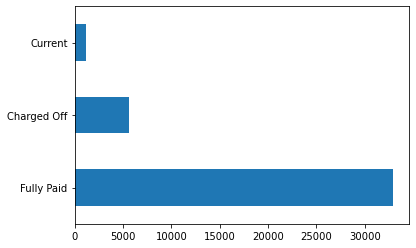

In [51]:
loan_df2['loan_status'].value_counts().plot.barh()

## 3.xx Univariate Analysis

<AxesSubplot:>

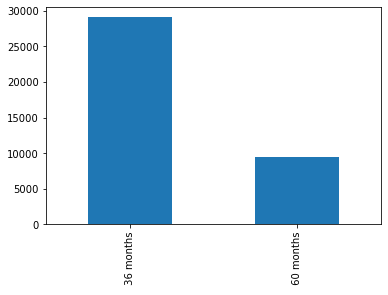

In [156]:
loan_df2['term'].value_counts().plot.bar()

In [52]:
#let's make this column as categorical variable to make use during analysis
loan_df2['term'] = loan_df2['term'].astype('category')

In [53]:
loan_df2['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [54]:
loan_df2['installment'].describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

In [55]:
#'loan_amnt' seems to have high variance inside data
# possible apporach may be to create a derived column with ordered categorical variable: 
#Very_Low_Amnt_Loan, Low_Amnt_Loan, Mid_Amnt_Loan, High_Amnt_Loan and Very_High_Amnt_Loan
loan_df2['Loan_Amnt__Bucket']=pd.qcut(loan_df2['loan_amnt'], q=[0,0.2,0.4,0.6,0.8,1.0],
                                     labels=['Very_Low_Amnt_Loan','Low_Amnt_Loan','Mid_Amnt_Loan','High_Amnt_Loan',
                                             'Very_High_Amnt_Loan'])

<AxesSubplot:>

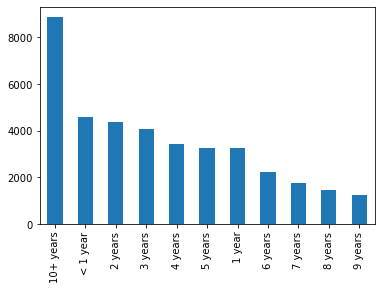

In [56]:
loan_df2['emp_length'].value_counts().plot.bar()

In [57]:
#let's convert 'emp_length' as categorical variable
loan_df2['emp_length'] = loan_df2['emp_length'].astype('category')

<AxesSubplot:>

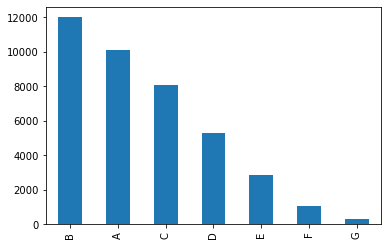

In [58]:
loan_df2['grade'].value_counts().plot.bar()

<AxesSubplot:>

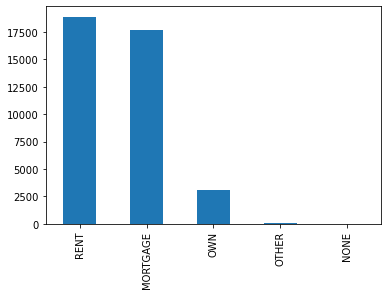

In [59]:
loan_df2['home_ownership'].value_counts().plot.bar()

In [60]:
#let's convert 'home_ownership' as categorical for using during analyis
loan_df2['home_ownership'] = loan_df2['home_ownership'].astype('category')

In [61]:
loan_df2['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:>

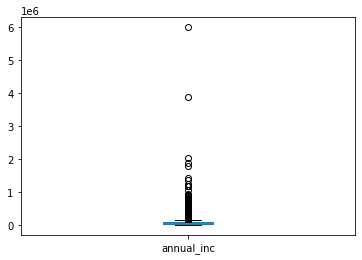

In [62]:
loan_df2['annual_inc'].plot.box()

In [63]:
#'annual_inc' seems to have high variance inside data
# possible apporach may be to create a derived column with ordered categorical variable: 
#Very_Low_Income, Low_Income, Mid_Income, High_Income and Very_High_Income
loan_df2['Income_Bucket']=pd.qcut(loan_df2['annual_inc'], q=[0,0.2,0.4,0.6,0.8,1.0],
                                     labels=['Very_Low_Income','Low_Income','Mid_Income','High_Income',
                                             'Very_High_Income'])

<AxesSubplot:>

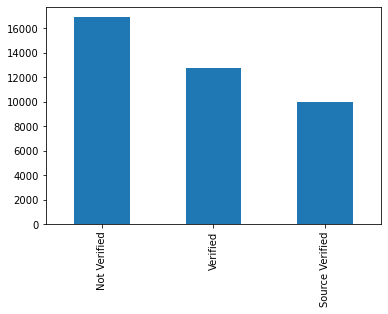

In [65]:
loan_df2['verification_status'].value_counts().plot.bar()

In [66]:
#let's convert this 'verification_status' as category for leveraging it for analysis
loan_df2['verification_status'] = loan_df2['verification_status'].astype('category')

In [67]:
loan_df2['dti'].describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

<AxesSubplot:>

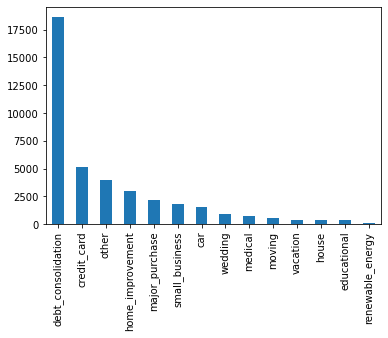

In [68]:
loan_df2['purpose'].value_counts().plot.bar()

In [69]:
#let's convert 'purpose' as categorical variable 
loan_df2['purpose'] = loan_df2['purpose'].astype('category')

In [70]:
loan_df2['open_acc'].describe()

count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [71]:
loan_df2['pub_rec'].describe()

count    39717.000000
mean         0.055065
std          0.237200
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [72]:
#need to drop this column since it has no useful information
loan_df2 = loan_df2.drop(columns='pub_rec')

In [73]:
loan_df2['inq_last_6mths'].describe()

count    39717.000000
mean         0.869200
std          1.070219
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

In [74]:
loan_df2['revol_bal'].describe()

count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64

In [75]:
#'revold_bal' seems to have high variance inside data
# possible apporach may be to create a derived column with ordered categorical variable: 
#Very_Low_Revol_Bal, Low_Revol_Bal, Mid_Revol_Bal, High_Revol_Bal and Very_High_Revol_Bal
loan_df2['Revol_Bal_Bucket']=pd.qcut(loan_df2['revol_bal'], q=[0,0.2,0.4,0.6,0.8,1.0],
                                     labels=['Very_Low_Revol_Bal','Low_Revol_Bal','Mid_Revol_Bal','High_Revol_Bal',
                                             'Very_High_Revol_Bal'])

In [76]:
loan_df2['total_acc'].describe()

count    39717.000000
mean        22.088828
std         11.401709
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

<AxesSubplot:>

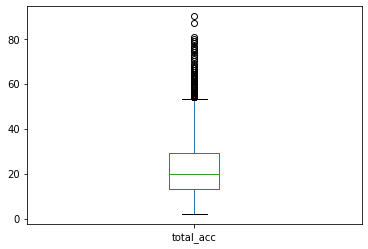

In [77]:
loan_df2['total_acc'].plot.box()

## 3.xx Bivariate Analysis

In [78]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   member_id             39717 non-null  int64   
 1   loan_amnt             39717 non-null  int64   
 2   term                  39717 non-null  category
 3   int_rate              39717 non-null  float64 
 4   installment           39717 non-null  float64 
 5   grade                 39717 non-null  object  
 6   sub_grade             39717 non-null  object  
 7   emp_title             37258 non-null  object  
 8   emp_length            38642 non-null  category
 9   home_ownership        39717 non-null  category
 10  annual_inc            39717 non-null  float64 
 11  verification_status   39717 non-null  category
 12  issue_d               39717 non-null  object  
 13  loan_status           39717 non-null  object  
 14  purpose               39717 non-null  category
 15  zi

In [79]:
#for further analyis we can ignore loan with Current status as we do not know outcome of those in future yet
loan_df2 = loan_df2[~(loan_df2['loan_status'] == 'Current')]

In [100]:
loan_df2['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 38577, dtype: object

In [101]:
#for further analyis let's create segments
loan_df_charge_off = loan_df2[(loan_df2['loan_status'] == 'Charged Off')]
loan_df_fully_paid = loan_df2[(loan_df2['loan_status'] == 'Fully Paid')]

### Charge Off  (defaulters) loan Analysis

In [102]:
loan_df_charge_off.size

157556

<AxesSubplot:xlabel='loan_status'>

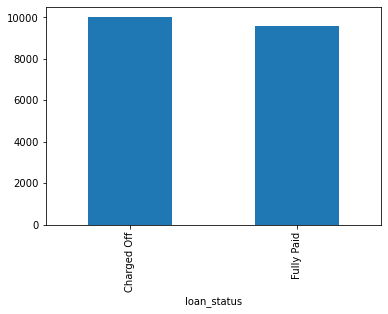

In [148]:
loan_df2.groupby(by='loan_status')['loan_amnt'].median().plot.bar()

<AxesSubplot:xlabel='loan_status'>

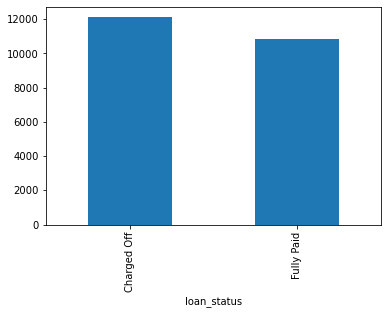

In [143]:
loan_df2.groupby(by='loan_status')['loan_amnt'].mean().plot.bar()

<AxesSubplot:xlabel='loan_status,term'>

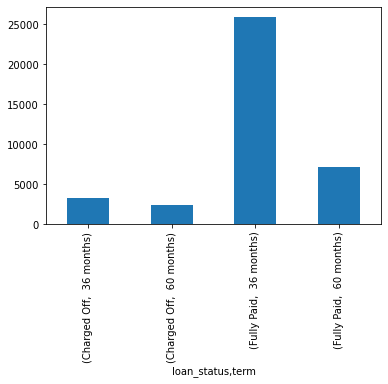

In [149]:
#what is the relationship between loan status vs loan terms
loan_df2.groupby(by='loan_status')['term'].value_counts().plot.bar()

<AxesSubplot:xlabel='term'>

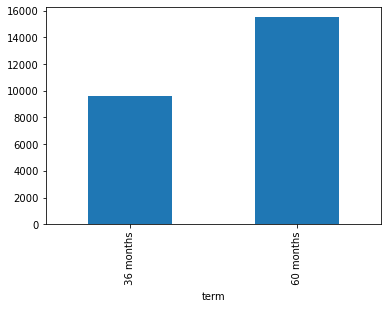

In [150]:
#what is the relationship between loan_amnt vs loan term
loan_df2.groupby(by='term')['loan_amnt'].mean().plot.bar()

<AxesSubplot:xlabel='term'>

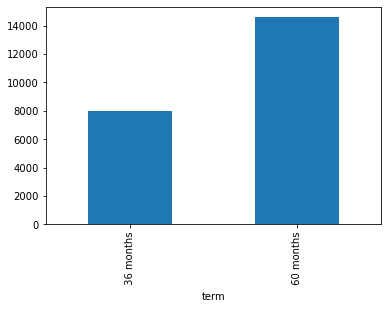

In [151]:
loan_df2.groupby(by='term')['loan_amnt'].median().plot.bar()

<AxesSubplot:xlabel='loan_status'>

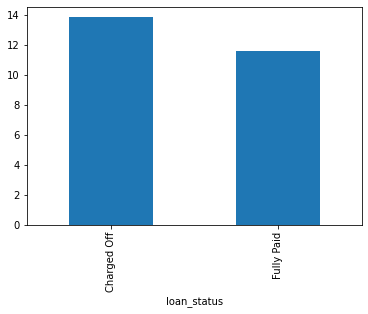

In [152]:
#what is the relationship between loan_status vs interest rate
loan_df2.groupby(by='loan_status')['int_rate'].mean().plot.bar()

<AxesSubplot:xlabel='loan_status'>

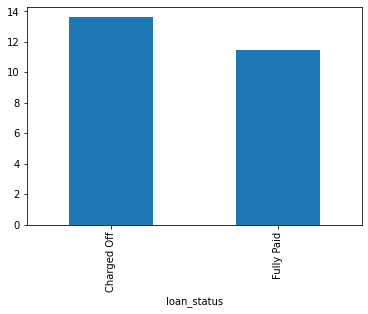

In [153]:
loan_df2.groupby(by='loan_status')['int_rate'].median().plot.bar()

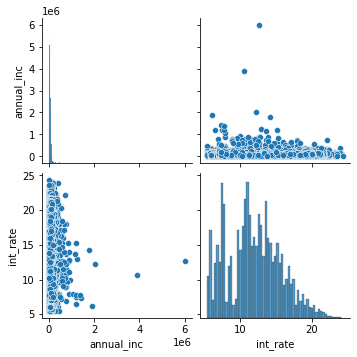

In [157]:
#what is the relationship annual income vs interest rate
sns.pairplot(data=loan_df2[['annual_inc','int_rate']])

In [ ]:
# what is the relationship between income and term of loan

<AxesSubplot:xlabel='Income_Bucket'>

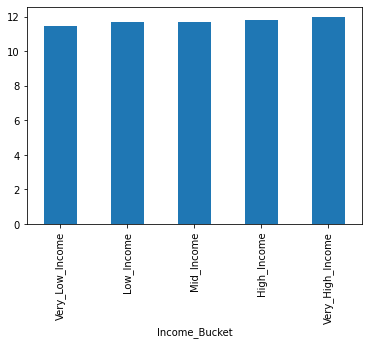

In [161]:
loan_df2.groupby(by='Income_Bucket')['int_rate'].median().plot.bar()

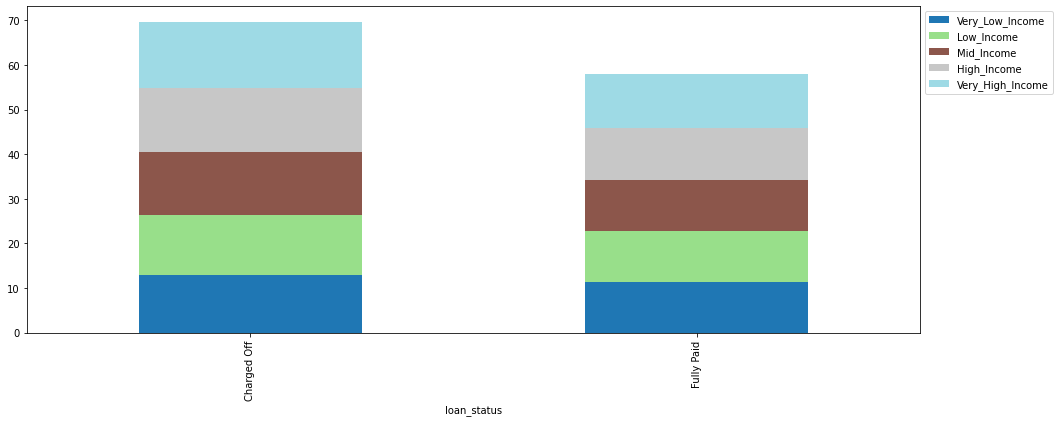

In [159]:
#what is the relationship among loan_status, annual income vs interest rate
loan_status_vs_income_vs_interest_rate = pd.pivot_table(data=loan_df2, index='loan_status', columns='Income_Bucket', values='int_rate')
loan_status_vs_income_vs_interest_rate.plot(kind='bar', stacked=True, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

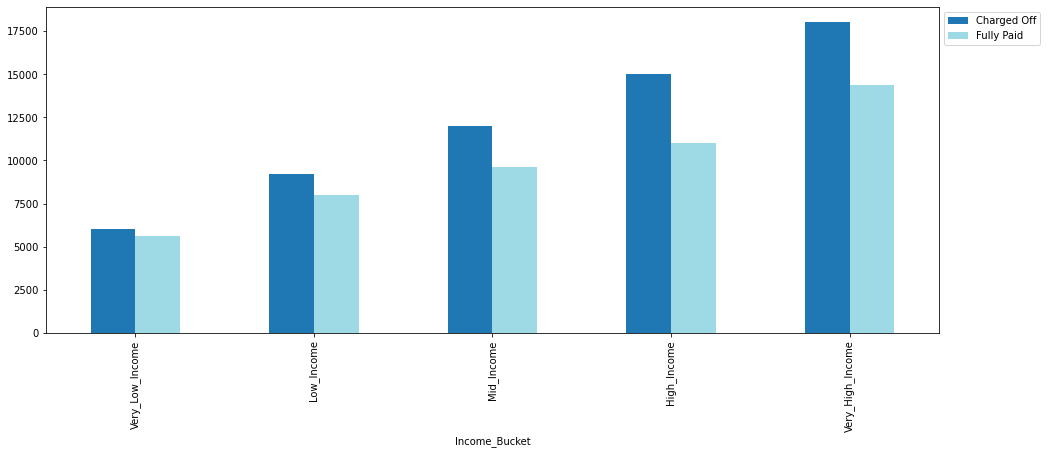

In [164]:
#what is the relationship among annual income, loan amount vs loan_status
income_vs_loan_amount = pd.pivot_table(data=loan_df2, index='Income_Bucket', columns='loan_status', values='loan_amnt', aggfunc=np.median)
income_vs_loan_amount.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

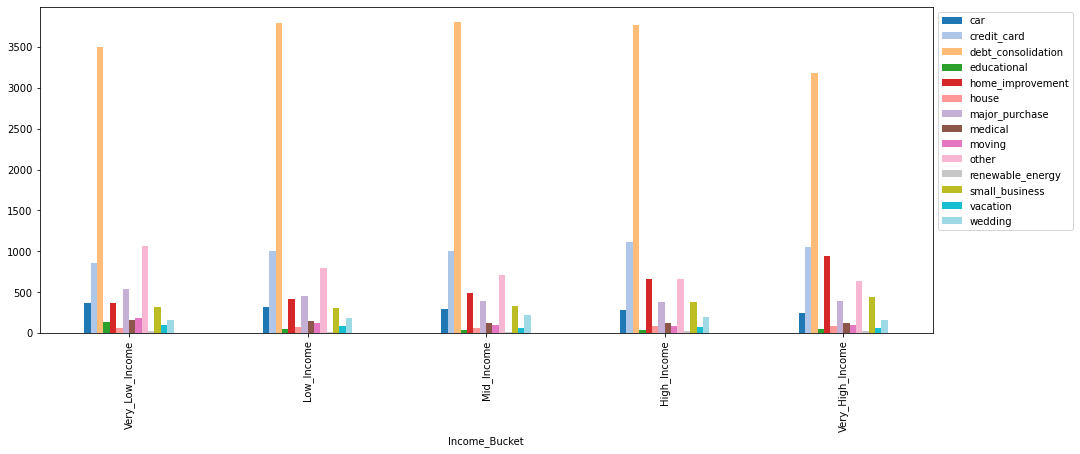

In [167]:
#what is the relationship among annual income, loan purpose vs loan_status
income_vs_loan_purpose = pd.pivot_table(data=loan_df2, index='Income_Bucket', columns='purpose', values='member_id', aggfunc='count')
income_vs_loan_purpose.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

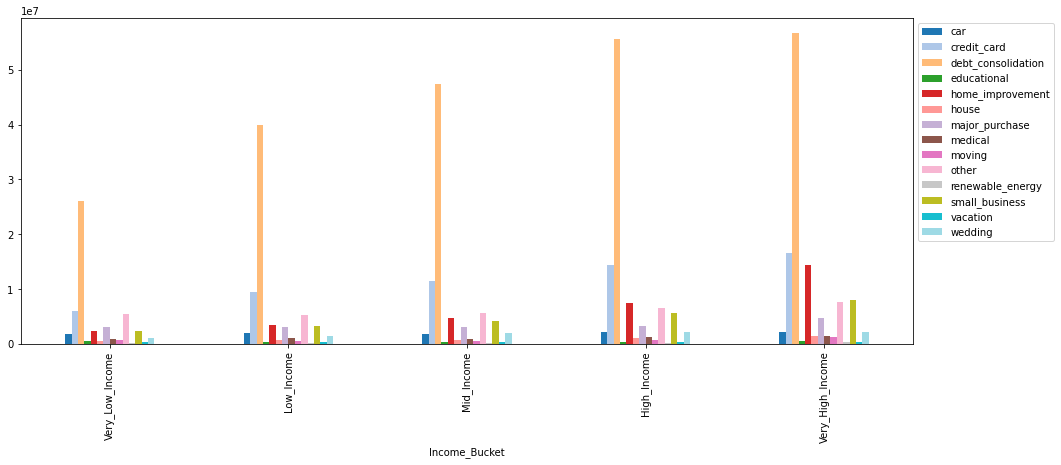

In [170]:
#what is the relationship among annual income, loan purpose vs loan_status
income_vs_loan_purpose = pd.pivot_table(data=loan_df2, index='Income_Bucket', columns='purpose', values='loan_amnt', aggfunc=sum)
income_vs_loan_purpose.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
#what is the relantionship between income vs debt

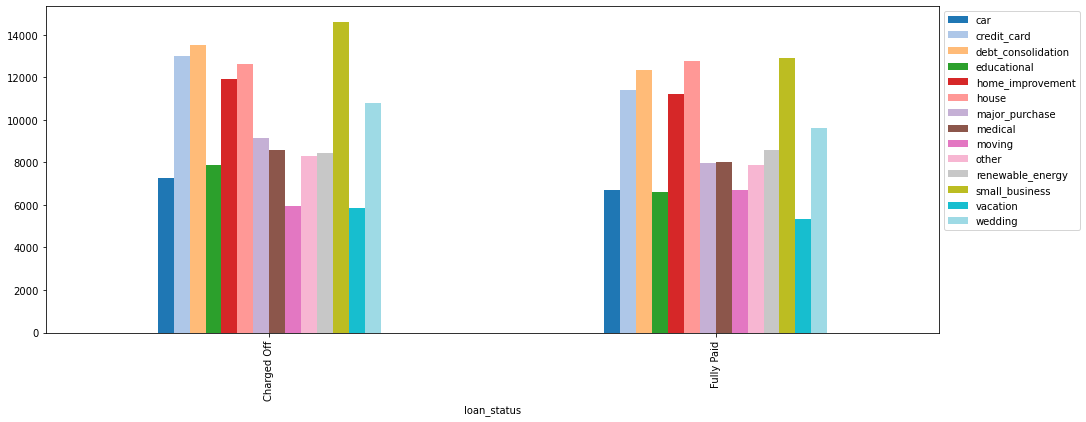

In [168]:
#what is the relationship among loan_amnt, loan purpose vs loan_status
income_vs_loan_purpose = pd.pivot_table(data=loan_df2, index='loan_status', columns='purpose', values='loan_amnt')
income_vs_loan_purpose.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [171]:
#what is the relationship between the location and loan status

<AxesSubplot:xlabel='purpose'>

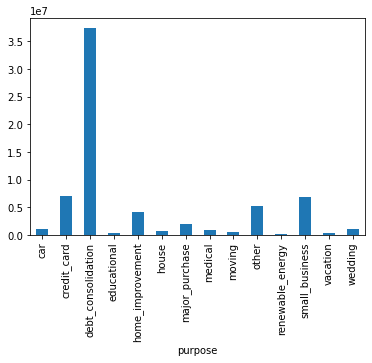

In [105]:
loan_df_charge_off.groupby(by='purpose')['loan_amnt'].sum().plot.bar()

<AxesSubplot:xlabel='Income_Bucket'>

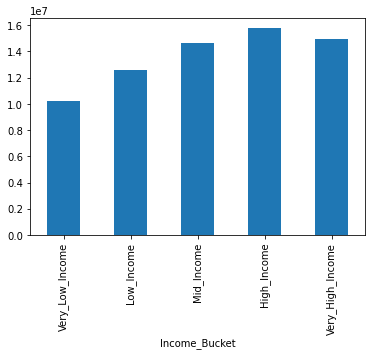

In [106]:
loan_df_charge_off.groupby(by='Income_Bucket')['loan_amnt'].sum().plot.bar()

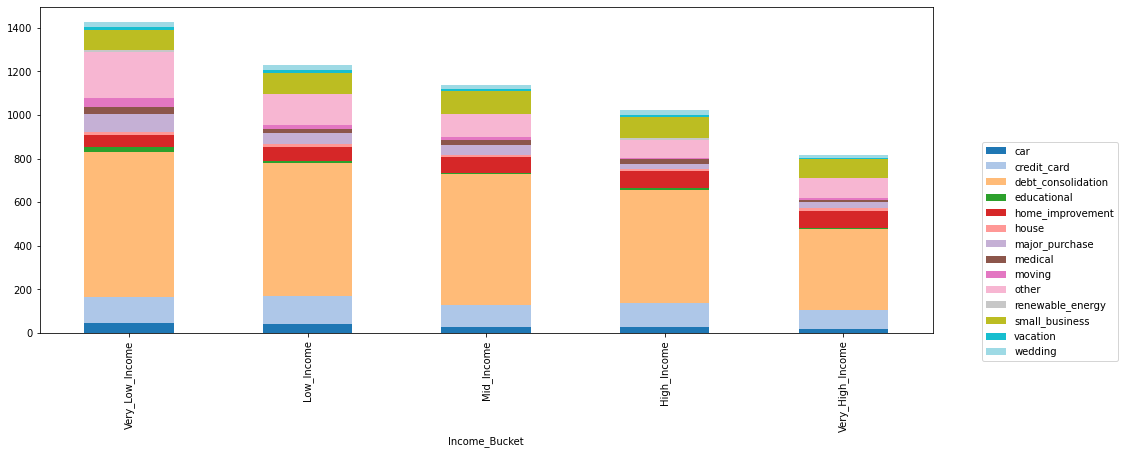

In [108]:
#let's visualize relationship between loan_status vs purpose
loan_status_vs_purpose = pd.pivot_table(data=loan_df_charge_off, index='Income_Bucket', 
                                              columns='purpose', values='member_id', aggfunc='count')
loan_status_vs_purpose.plot(kind='bar', stacked=True, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

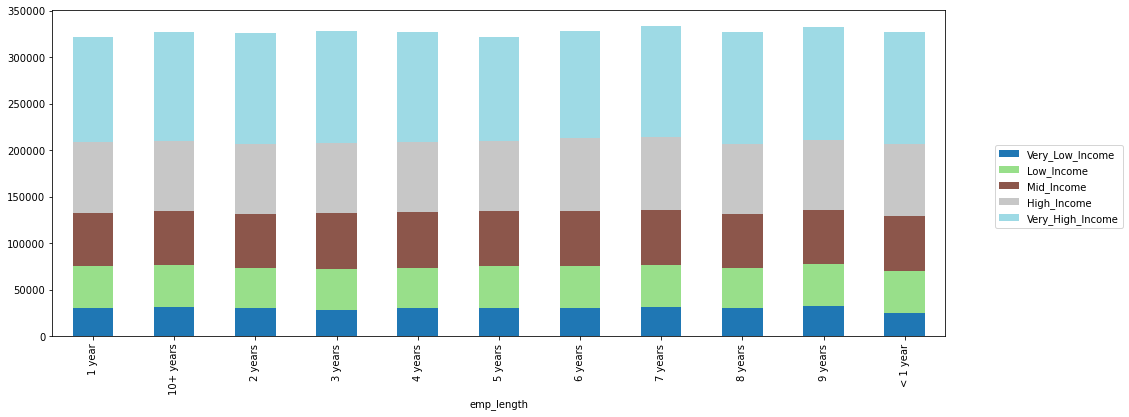

In [110]:
#what is the relationship between income & length of employment
income_vs_emp_length = pd.pivot_table(data=loan_df_charge_off, index='emp_length', 
                                              columns='Income_Bucket', values='annual_inc', aggfunc=np.median)
income_vs_emp_length.plot(kind='bar', stacked=True, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

<AxesSubplot:>

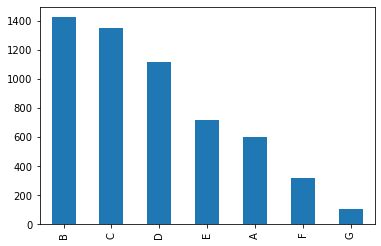

In [112]:
#what is the relationship of grade for charge-off loans
loan_df_charge_off['grade'].value_counts().plot.bar()

<AxesSubplot:xlabel='grade,sub_grade'>

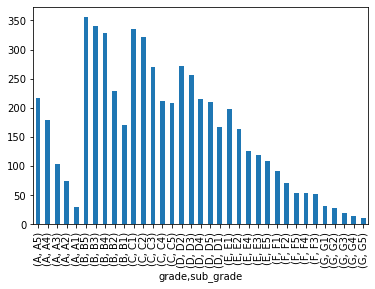

In [113]:
loan_df_charge_off.groupby(['grade'])['sub_grade'].value_counts().plot.bar()
plt.figimage()

<AxesSubplot:>

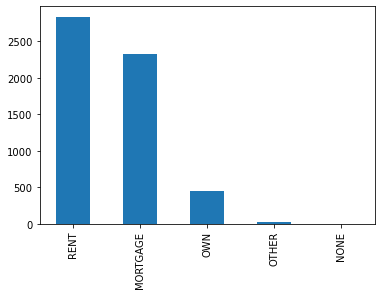

In [115]:
loan_df_charge_off['home_ownership'].value_counts().plot.bar()

<AxesSubplot:>

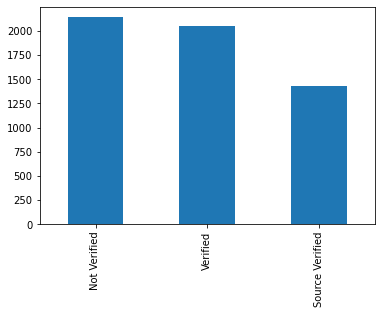

In [117]:
loan_df_charge_off['verification_status'].value_counts().plot.bar()

<AxesSubplot:>

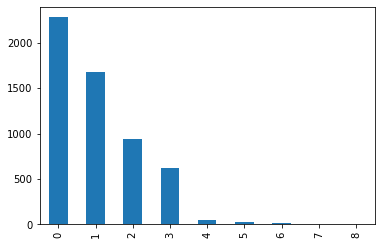

In [119]:
loan_df_charge_off['inq_last_6mths'].value_counts().plot.bar()

<AxesSubplot:>

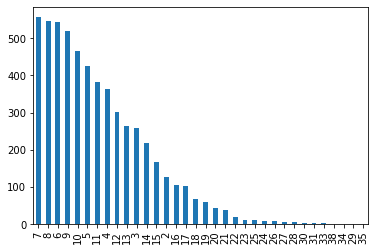

In [120]:
loan_df_charge_off['open_acc'].value_counts().plot.bar()

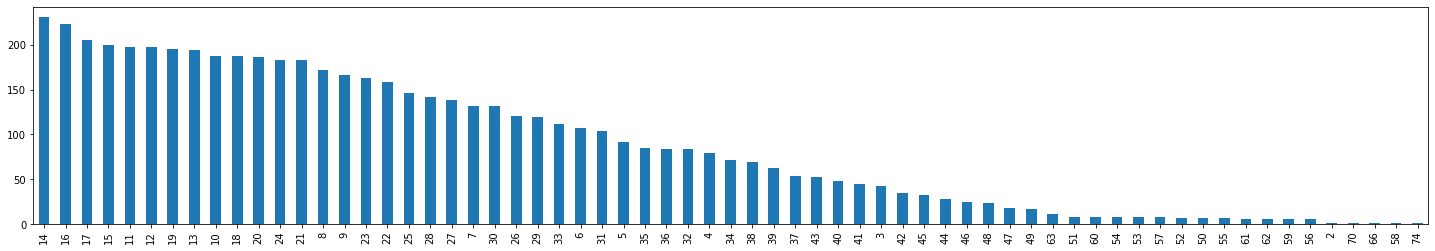

In [131]:
#what is the relationship between income & revolving balancce
f = plt.figure()
f.set_figwidth(25)
loan_df_charge_off['total_acc'].value_counts().plot.bar()

plt.show()

<AxesSubplot:>

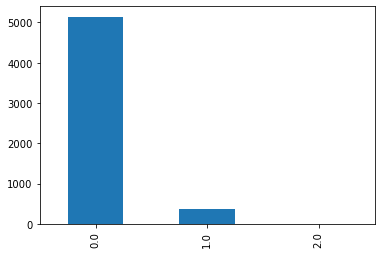

In [132]:
loan_df_charge_off['pub_rec_bankruptcies'].value_counts().plot.bar()

### Fully Paid loan Analysis

<AxesSubplot:xlabel='purpose'>

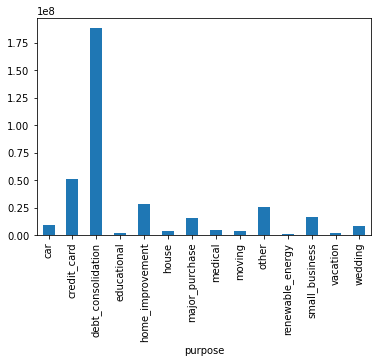

In [134]:
loan_df_fully_paid.groupby(by='purpose')['loan_amnt'].sum().plot.bar()

In [133]:
loan_df_fully_paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   member_id             32950 non-null  int64   
 1   loan_amnt             32950 non-null  int64   
 2   term                  32950 non-null  category
 3   int_rate              32950 non-null  float64 
 4   installment           32950 non-null  float64 
 5   grade                 32950 non-null  object  
 6   sub_grade             32950 non-null  object  
 7   emp_title             31048 non-null  object  
 8   emp_length            32145 non-null  category
 9   home_ownership        32950 non-null  category
 10  annual_inc            32950 non-null  float64 
 11  verification_status   32950 non-null  category
 12  issue_d               32950 non-null  object  
 13  loan_status           32950 non-null  object  
 14  purpose               32950 non-null  category
 15  zi

In [118]:
loan_df_charge_off.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   member_id             5627 non-null   int64   
 1   loan_amnt             5627 non-null   int64   
 2   term                  5627 non-null   category
 3   int_rate              5627 non-null   float64 
 4   installment           5627 non-null   float64 
 5   grade                 5627 non-null   object  
 6   sub_grade             5627 non-null   object  
 7   emp_title             5143 non-null   object  
 8   emp_length            5399 non-null   category
 9   home_ownership        5627 non-null   category
 10  annual_inc            5627 non-null   float64 
 11  verification_status   5627 non-null   category
 12  issue_d               5627 non-null   object  
 13  loan_status           5627 non-null   object  
 14  purpose               5627 non-null   category
 15  zip

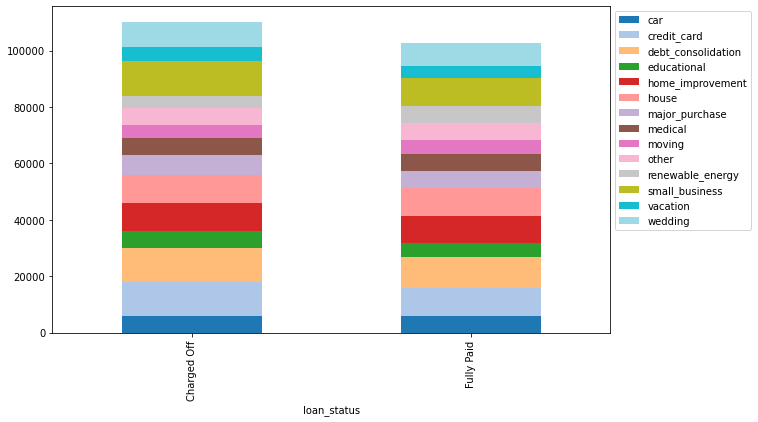

In [140]:
#let's visualize relationship between loan_status vs purpose
loan_status_vs_purpose = pd.pivot_table(data=loan_df2, index='loan_status', 
                                              columns='purpose', values='loan_amnt', aggfunc=np.median)
loan_status_vs_purpose.plot(kind='bar', stacked=True, figsize=[10,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [81]:
#let's visualize relationship between loan_status vs Income_Bucket
loan_status_vs_Income_Bucket = pd.pivot_table(data=loan_df2, index='loan_status', 
                                              columns='Income_Bucket', values='loan_amnt', aggfunc=np.median)

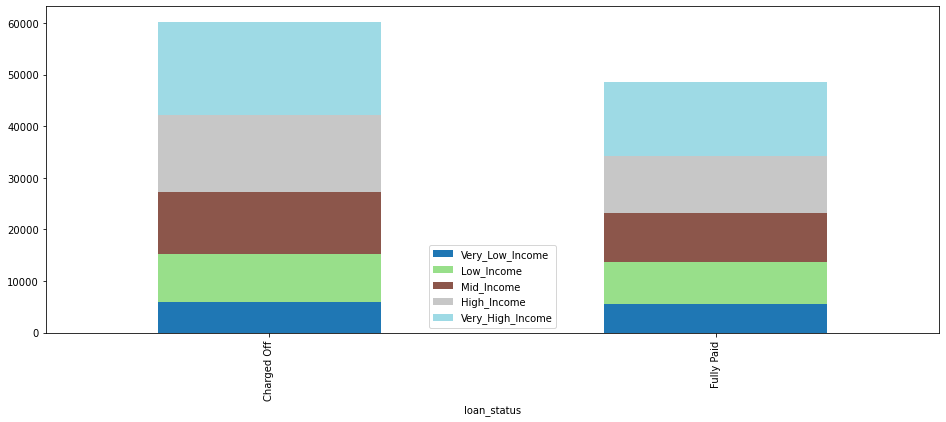

In [82]:
loan_status_vs_Income_Bucket.plot(kind='bar', stacked=True, figsize=[16,6],colormap='tab20')
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='Income_Bucket', ylabel='loan_status'>

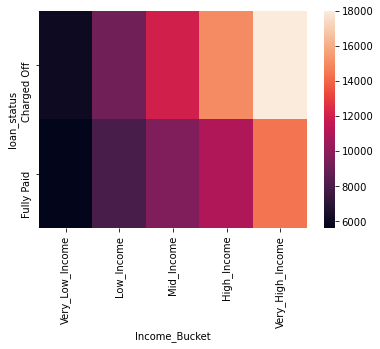

In [83]:
sns.heatmap(loan_status_vs_Income_Bucket)

In [84]:
#let's visualize relationship between purpose of loan vs income of people
Income_Bucket_vs_loan_purpose = pd.pivot_table(data=loan_df2, index='Income_Bucket', 
                                              columns='purpose', values='loan_amnt', aggfunc=np.median)

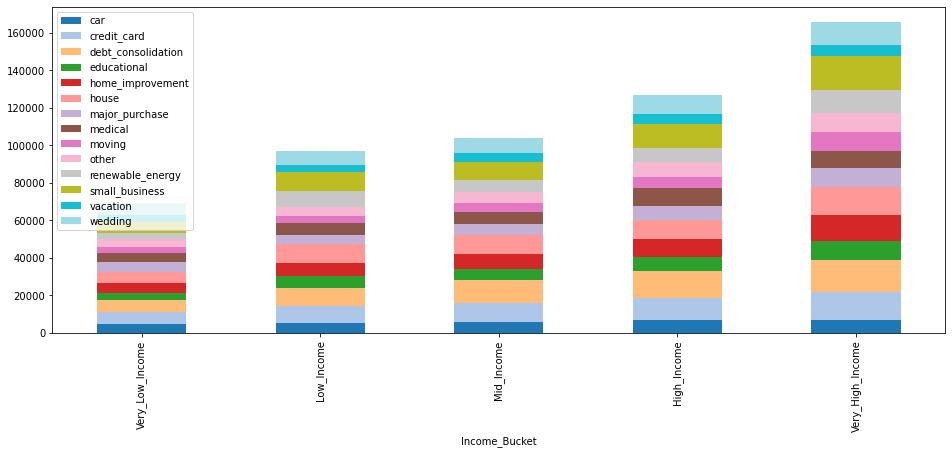

In [85]:
Income_Bucket_vs_loan_purpose.plot(kind='bar', stacked=True, figsize=[16,6],colormap='tab20')
plt.legend(loc='best')
plt.show()

In [86]:
#let's visualize relationship between loan_status vs Revol_Bal_Bucket
loan_status_vs_Revol_Bal_Bucket = pd.pivot_table(data=loan_df2, index='loan_status', 
                                              columns='Revol_Bal_Bucket', values='loan_amnt', aggfunc=np.median)

<AxesSubplot:xlabel='Revol_Bal_Bucket', ylabel='loan_status'>

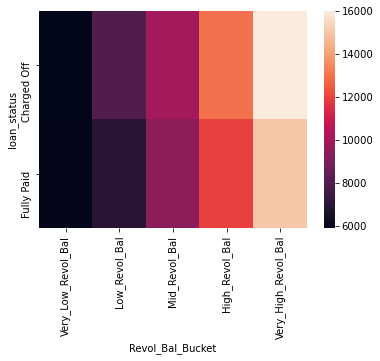

In [87]:
sns.heatmap(loan_status_vs_Revol_Bal_Bucket)

<AxesSubplot:xlabel='term', ylabel='loan_status'>

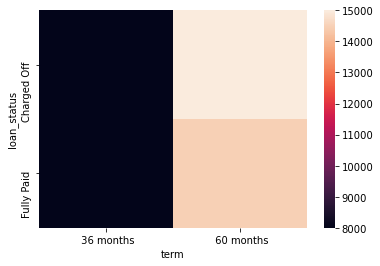

In [88]:
#let's visualize relationship between loan_status vs loan term
loan_status_vs_loan_term = pd.pivot_table(data=loan_df2, index='loan_status', 
                                              columns='term', values='loan_amnt', aggfunc=np.median)
sns.heatmap(loan_status_vs_loan_term)

<AxesSubplot:xlabel='emp_length', ylabel='loan_status'>

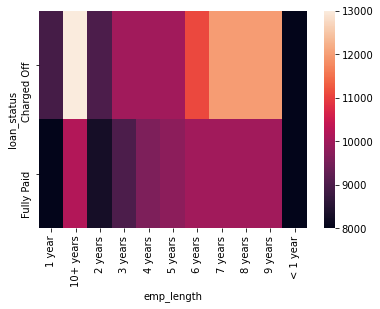

In [89]:
#let's visualize relationship between loan_status vs career length
loan_status_vs_emp_length = pd.pivot_table(data=loan_df2, index='loan_status', 
                                              columns='emp_length', values='loan_amnt', aggfunc=np.median)
sns.heatmap(loan_status_vs_emp_length)

<AxesSubplot:ylabel='emp_length'>

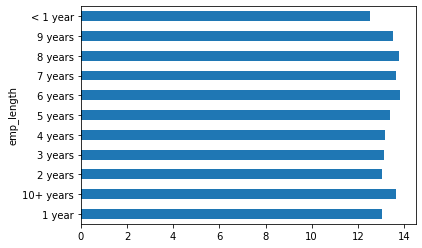

In [90]:
loan_df2.groupby(by=['emp_length'])['dti'].mean().plot.barh()

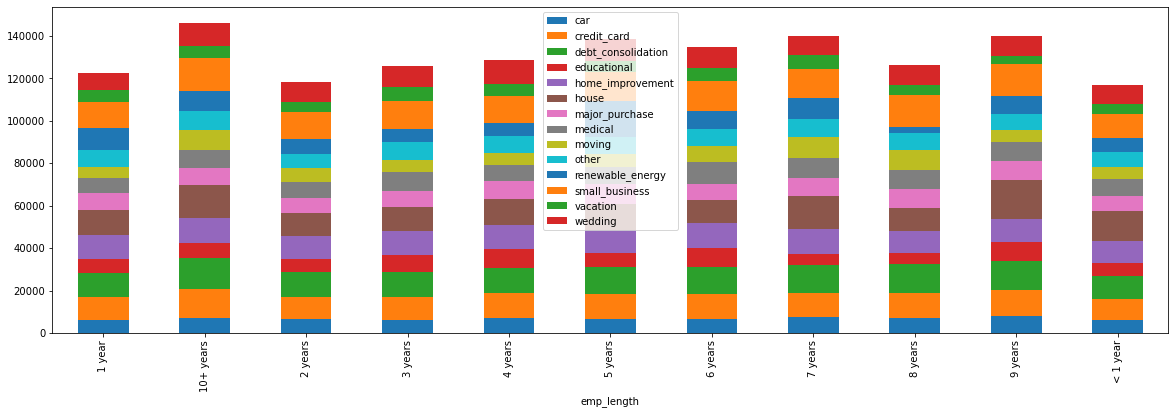

In [91]:
#let's understand the purpose of loan based on length of career
emp_length_vs_purpose = pd.pivot_table(data=loan_df2, index='emp_length', values='loan_amnt', columns='purpose')
emp_length_vs_purpose.plot(kind='bar', stacked=True, figsize=[20,6])
plt.legend(loc='best')
plt.show()

### let's analyse relationship of loan_status with each numerical columns

<AxesSubplot:ylabel='loan_status'>

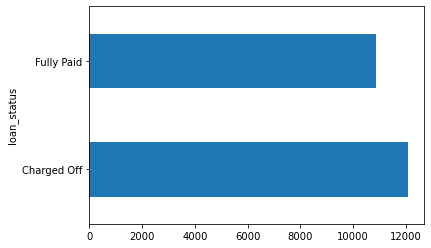

In [199]:
loan_df2.groupby(by=['loan_status'])['loan_amnt'].mean().plot.barh()

In [198]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  object  
 5   sub_grade             38577 non-null  object  
 6   emp_title             36191 non-null  object  
 7   emp_length            37544 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  object  
 13  purpose               38577 non-null  category
 14  zip_code              38577 non-null  object  
 15  ad

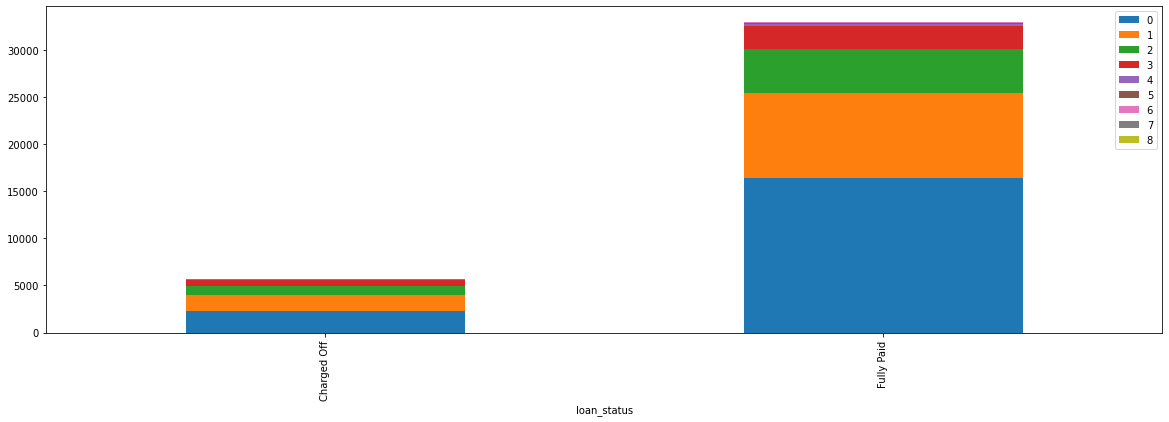

In [92]:
# let's analyze relationship loan_status vs inq_last_6mths
loan_status_vs_inq_last_6mths = pd.pivot_table(data=loan_df2, index='loan_status', values='member_id', columns='inq_last_6mths',aggfunc='count')
loan_status_vs_inq_last_6mths.plot(kind='bar', stacked=True, figsize=[20,6])
plt.legend(loc='best')
plt.show()

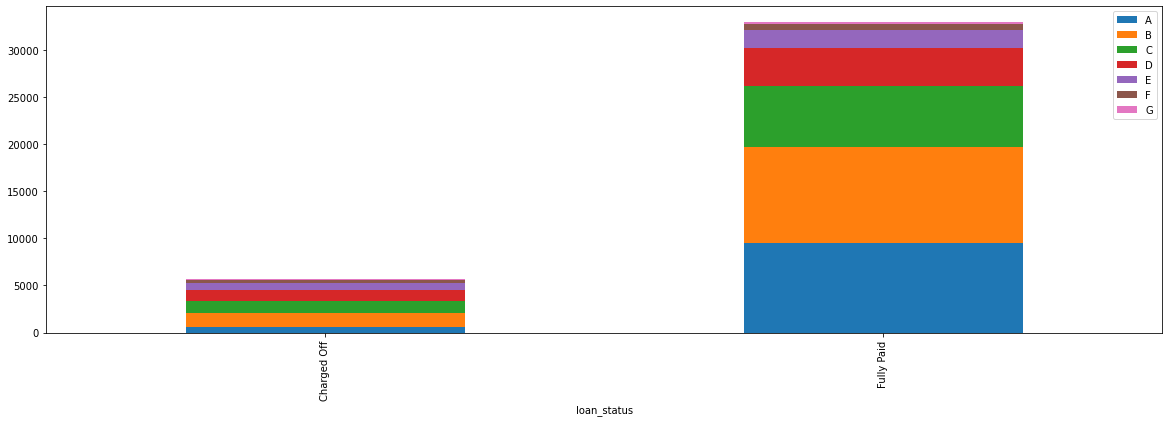

In [93]:
# let's analyze relationship loan_status vs grade
loan_status_vs_grade = pd.pivot_table(data=loan_df2, index='loan_status', values='member_id', columns='grade', aggfunc='count')
loan_status_vs_grade.plot(kind='bar', stacked=True, figsize=[20,6])
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='loan_status'>

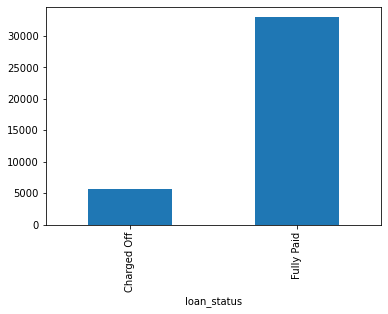

In [214]:
# let's analyze relationship loan_status vs home_ownership
loan_df2.groupby(by=['loan_status'])['home_ownership'].count().plot.bar(stacked=True)

### conclusion xx: no relationship of loan status vs loan amount

In [ ]:
loan_df3.groupby(by=['loan_status'])['loan_amnt'].mean().plot.barh()

## 3.4 Analyze relationship of "Charged Off" with customer related params

In [70]:
loan_df_charged_off = loan_df3[(loan_df3['loan_status']=='Charged Off')]

In [71]:
loan_df_charged_off.shape

(5627, 21)

In [72]:
loan_df_charged_off.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            5627 non-null   int64  
 1   term                 5627 non-null   object 
 2   int_rate             5627 non-null   float64
 3   installment          5627 non-null   float64
 4   grade                5627 non-null   object 
 5   sub_grade            5627 non-null   object 
 6   home_ownership       5627 non-null   object 
 7   annual_inc           5627 non-null   float64
 8   verification_status  5627 non-null   object 
 9   issue_d              5627 non-null   object 
 10  loan_status          5627 non-null   object 
 11  purpose              5627 non-null   object 
 12  zip_code             5627 non-null   object 
 13  addr_state           5627 non-null   object 
 14  dti                  5627 non-null   float64
 15  earliest_cr_line     5627 non-null   

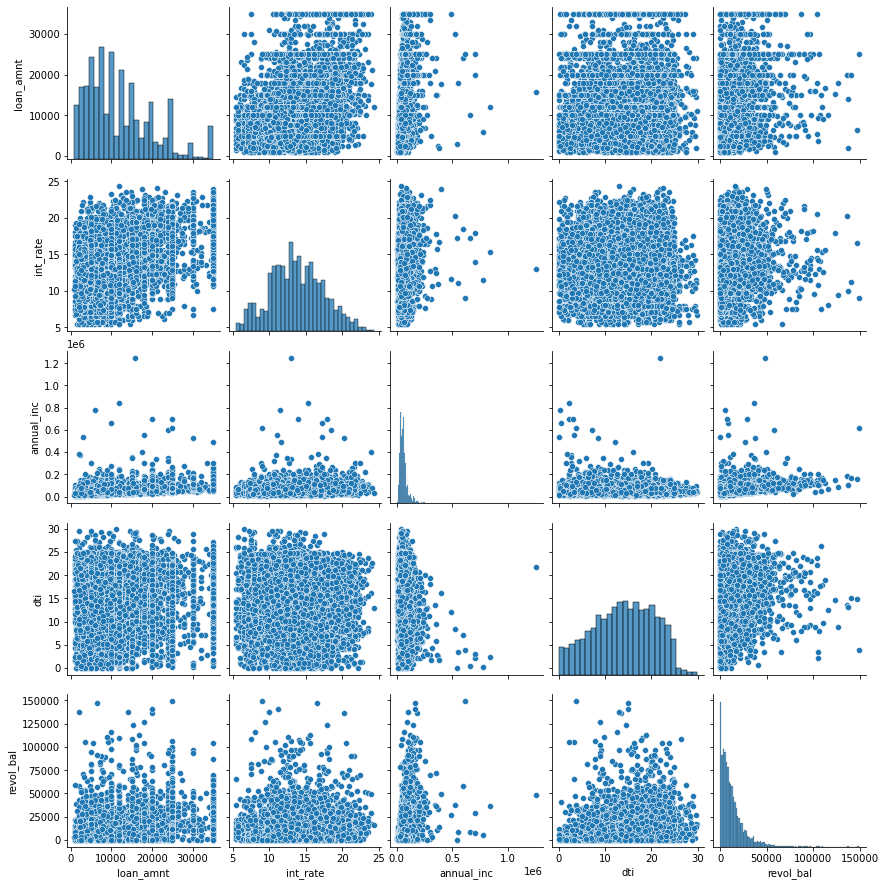

In [101]:
sns.pairplot(loan_df_charged_off[['loan_amnt','int_rate','annual_inc','dti','revol_bal']])

In [100]:
loan_df_charged_off.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            5627 non-null   int64  
 1   term                 5627 non-null   object 
 2   int_rate             5627 non-null   float64
 3   installment          5627 non-null   float64
 4   grade                5627 non-null   object 
 5   sub_grade            5627 non-null   object 
 6   home_ownership       5627 non-null   object 
 7   annual_inc           5627 non-null   float64
 8   verification_status  5627 non-null   object 
 9   issue_d              5627 non-null   object 
 10  loan_status          5627 non-null   object 
 11  purpose              5627 non-null   object 
 12  zip_code             5627 non-null   object 
 13  addr_state           5627 non-null   object 
 14  dti                  5627 non-null   float64
 15  earliest_cr_line     5627 non-null   

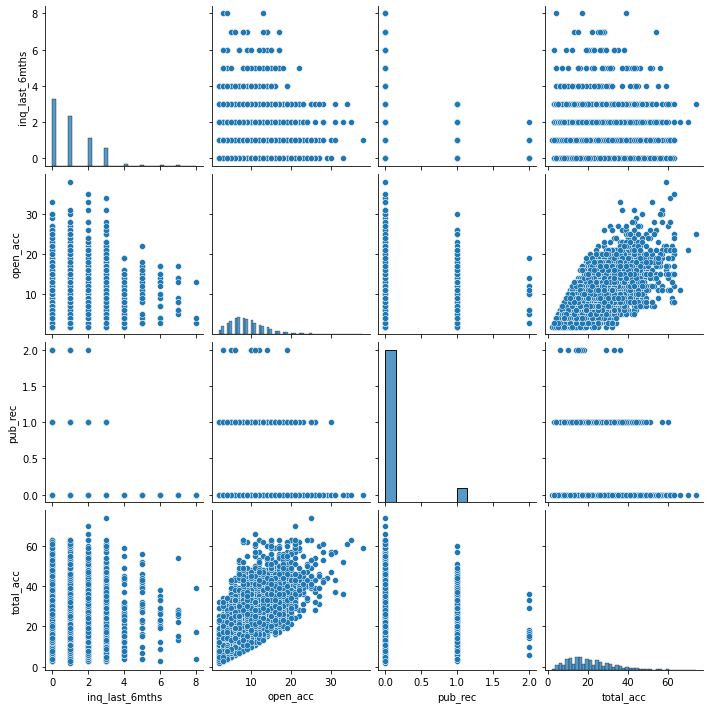

In [102]:
sns.pairplot(loan_df_charged_off[['inq_last_6mths','open_acc','pub_rec','total_acc']])